In [2]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

## 多层输出

In [3]:
# 建造一个out_channel = 3的卷积网络
conv1 = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3)

In [7]:
# 初始化卷积网络的参数

Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0] = Gx
conv1.state_dict()['weight'][1][0] = Gy
conv1.state_dict()['weight'][2][0] = torch.ones(3,3)

conv1.state_dict()['bias'][:] = torch.zeros(3)
conv1.state_dict()['bias']

tensor([0., 0., 0.])

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])


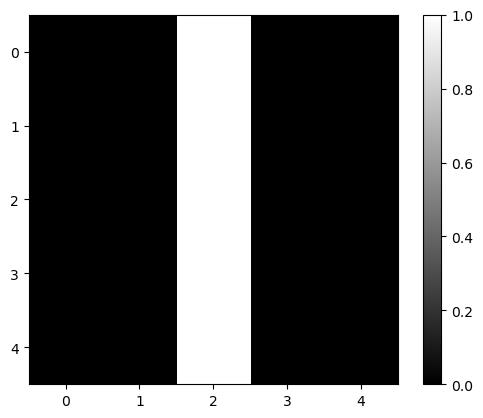

In [17]:
# 创造一幅图片并将其画出

image = torch.zeros(1,1,5,5)
image[0,0,:,2] = 1
print(image)

plt.imshow(image[0,0,:,:].numpy(),interpolation='nearest',cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [19]:
out=conv1(image)
out.shape

torch.Size([1, 3, 3, 3])

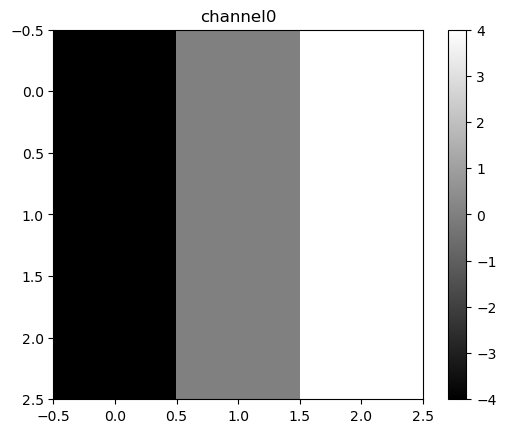

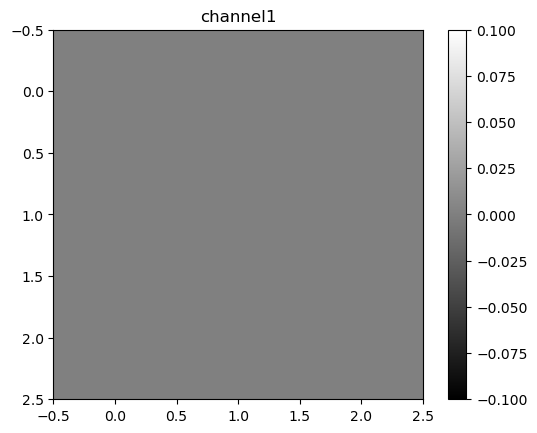

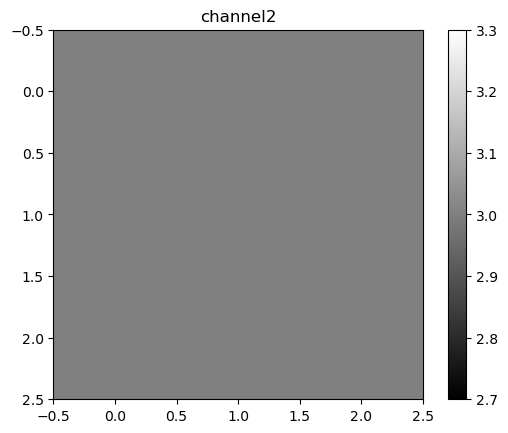

In [23]:
# 把三层图像的每一层都输出

for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(),interpolation='nearest',cmap=plt.cm.gray)
    plt.title('channel'+str(channel))
    plt.colorbar()
    plt.show()


tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


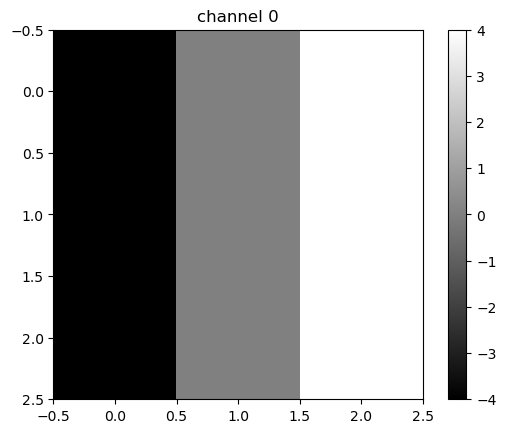

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


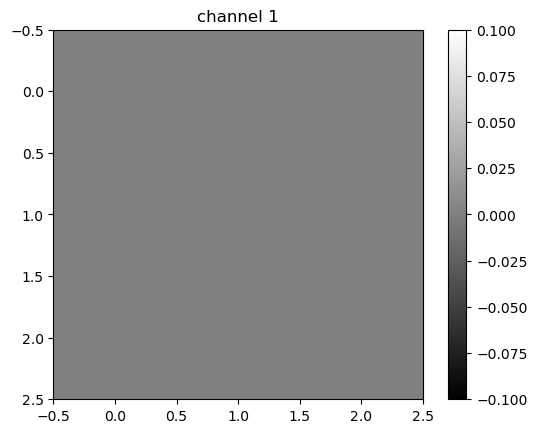

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


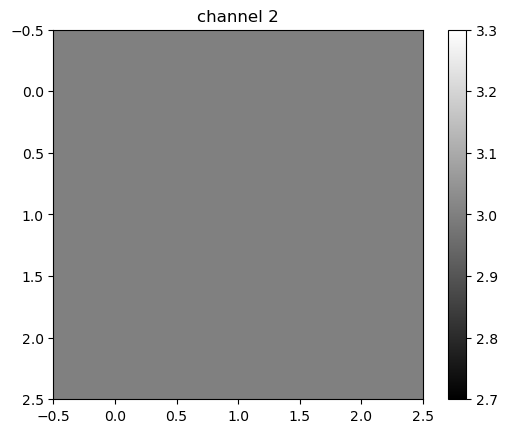

In [24]:
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

## 多层输入网络

In [26]:
conv2 = nn.Conv2d(in_channels=2,out_channels=1,kernel_size=3)

In [28]:
Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv2.state_dict()['weight'][0][0]=1*Gx1
conv2.state_dict()['weight'][0][1]=-2*Gx1
conv2.state_dict()['bias'][:]=torch.tensor([0.0])

print(conv2.state_dict()['weight'])

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]])


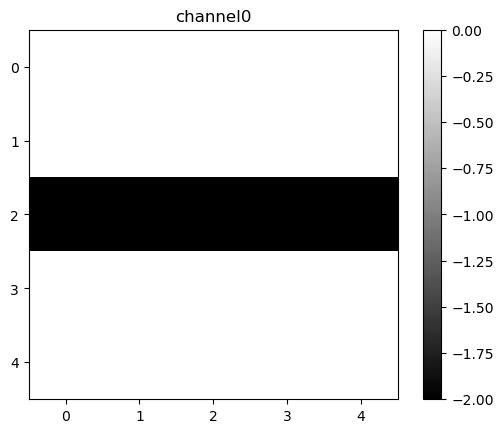

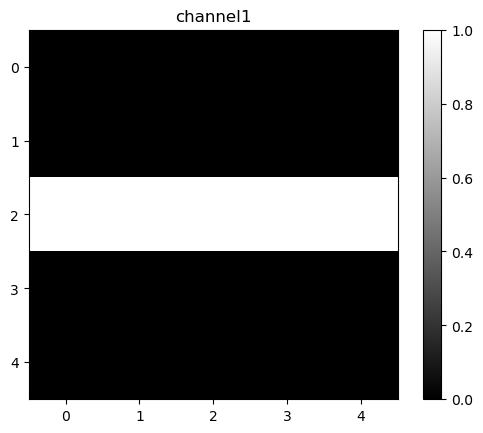

In [31]:
image2=torch.zeros(1,2,5,5)
image2[0,0,2,:]=-2
image2[0,1,2,:]=1
image2

# 输出两张图片
for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(),interpolation='nearest',cmap=plt.cm.gray)
    plt.colorbar()
    plt.title('channel'+str(channel))
    plt.show()

In [30]:
conv2(image2)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)